In [1]:
!pip install xarray netcdf4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.1 MB/s eta 0:00:00


In [2]:
import xarray as xr

In [68]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [21]:
file_path = '/content/drive/MyDrive/P_Misc/Climate-Forecasting/tmax.2m.mon.mean.nc'
ncep_temp_monthly_mean = xr.open_dataset(file_path)

In [24]:
ncep_temp_monthly_mean

<xarray.Dataset>
Dimensions:    (level: 1, lat: 94, lon: 192, time: 532, nbnds: 2)
Coordinates:
  * level      (level) float32 2.0
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-04-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    tmax       (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

In [25]:
ncep_temp_monthly_mean['tmax'].shape

(532, 1, 94, 192)

In [35]:
ncep_temp_monthly_mean.tmax

<xarray.DataArray 'tmax' (time: 532, level: 1, lat: 94, lon: 192)>
[9601536 values with dtype=float32]
Coordinates:
  * level    (level) float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-04-01
Attributes: (12/14)
    long_name:      Monthly Forecast of Maximum Temperature at 2 m
    units:          degK
    precision:      2
    GRIB_id:        15
    GRIB_name:      T MAX
    var_desc:       Maximum Temperature
    ...             ...
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  temperature
    cell_methods:   time: maximum (interval: 6 hours to daily maximum time: m...
    valid_range:    [120. 430.]
    actual_range:   [203.41 322.43]

In [37]:
level = ncep_temp_monthly_mean.level.values
lat = ncep_temp_monthly_mean.lat.values
lon = ncep_temp_monthly_mean.lon.values
time = ncep_temp_monthly_mean.time.values 
level[0], lat[0], lon[0], time[0]

(2.0, 88.542, 0.0, numpy.datetime64('1979-01-01T00:00:00.000000000'))

In [64]:
#tmax[month, lat, lon]
last_month_data = ncep_temp_monthly_mean.tmax[-1,:,:] #getting all tmax around the world for last month (2023-04-01)

In [72]:
last_month_data = last_month_data.values.reshape(94, 192)
longitude = np.linspace(-180, 180, 192)
latitude = np.linspace(-90, 90, 94)
longitude, latitude = np.meshgrid(longitude, latitude)

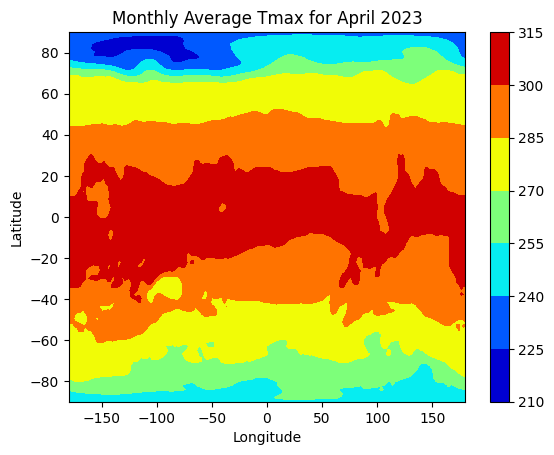

In [74]:
plt.contourf(longitude, latitude, last_month_data, cmap='jet')
plt.colorbar()  # Add a colorbar for reference
plt.title('Monthly Average Tmax for April 2023')  # Set a title for the plot
plt.xlabel('Longitude')  # Label the x-axis
plt.ylabel('Latitude')  # Label the y-axis
plt.show()  # Display the plot


In [ ]:
file_path_precip = '/content/drive/MyDrive/P_Misc/Climate-Forecasting/prate.sfc.mon.mean.nc'
dataset_precip = xr.open_dataset(file_path_precip)


In [ ]:
dataset_precip

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, time: 532, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-04-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    prate      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...